# Business Activity Trends during COVID-19
### COMM 187 (160DS): Data Science in Communication Research -- Spring 2024

**Names:** Melody Hway, Sadie Szeto, Bella Roy, Zoe Musch

**Dataset:** Business Activity Trends


### Introduction
The Business Activity Trends dataset presents global trends in business activity during the COVID-19 pandemic, categorized by country, business verticals, activity quantile, activity percentage, and date. Researchers from Data for Good compiled Facebook data, such as the number of daily posts by business pages and the types of content posted, to represent business quantiles and percentages. The data compares business activity by nation with a focus on Facebook activity beginning from 03/01/2020 to 11/29/2022.\
Our study aims to narrow down this data, focusing on four countries in Asia with varying GDPs and four distinct industries. We anticipate that business sectors impacted by social distancing and shelter-in-place policies will experience a decline, while sectors not dependent on in-person gatherings and sales may experience minimal loss or even an increase in activity. Furthermore, we expect that countries with lower GDPs, such as Brunei and Laos, will experience a more significant economic downturn compared to those with higher GDPs and more resources, such as Hong Kong and Singapore. 
### Core Research Question: 
#### How were different business sectors in Hong Kong, Singapore, Brunei, and Laos affected in the first year of COVID-19 following the first lockdown procedures implemented on March 1, 2020?
We have formulated several hypotheses:\
**Hypothesis 1**: Business activity in the public goods industry will have an overall increase in Facebook posting activity during the first year of COVID-19 lockdowns compared to overall activity in these nations.\
**Hypothesis 2**: Business activity in the lifestyle services industry will decrease in Hong Kong, Singapore, Laos, and Brunei during the first year of the COVID-19 pandemic compared to the average of other industries in the same countries.\
**Hypothesis 3**: The impact of the virus on business activity levels will differ significantly between these countries, with Singapore potentially showing the highest resilience in maintaining business activities.\
**Hypothesis 4**: Business activity in the travel industry, as indicated by the frequency of posts on Facebook, will decline in Hong Kong, Singapore, Laos, and Brunei during the first year following the implementation of COVID-19 restrictions.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
df0 = pd.read_csv('merged.csv')
# trying to remove the broken merged rows
drops = df0[df0['activity_quantile']=="activity_quantile"]
drops_num = drops.index
num_drops = drops_num.to_list()
df0.drop(labels = num_drops, axis = 'index', inplace = True)
# create new columns with the float type for quantile and percentage 
df0['n_activity_quantile'] = df0['activity_quantile'].astype(float)
df0['n_activity_percentage'] = df0['activity_percentage'].astype(float)
# WORKING DATA
choice_nations = ['Hong Kong', 'Singapore', 'Laos', 'Brunei']
df = df0[df0["gadm_name"].isin(choice_nations)].sort_values(by = ['gadm_name','ds'])
df.drop(labels = ['gadm_level','gadm1_name','gadm2_name'], axis = 1, inplace = True)

In [3]:
# statistics
stats_by_nation = df.groupby('gadm_name')[['n_activity_quantile', 'n_activity_percentage']].agg(['mean','std', 'median'])
all_stats = df0[['n_activity_quantile', 'n_activity_percentage']].agg(['mean','std', 'median']) # across 2 years and for all nations and industries # considered to be population?

### Statistical Representation of FB posts after COVID-19 Restrictions by Activity Quantile and Percentage
---
| Nation     | Activity Quantile Mean | Activity Quantile STD | Activity Quantile Median | Activity Percentage Mean | Activity Percentage STD | Activity Percentage Median |
|------------|------------------------|-----------------------|--------------------------|--------------------------|-------------------------|----------------------------|
| Brunei     | 0.512348               | 0.210211              | 0.516565                 | 135.668217               | 60.163651               | 126.369129                 |
| Hong Kong  | 0.389679               | 0.198603              | 0.367873                 | 106.116460               | 16.332590               | 106.827017                 |
| Laos       | 0.317423               | 0.230099              | 0.268460                 | 97.382122                | 30.967060               | 94.213110                  |
| Singapore  | 0.415866               | 0.259965              | 0.400470                 | 112.335035               | 28.040267               | 109.432085                 |
| All Activity | 0.433391             | 0.213466              | 0.434578                 | 115.884333               | 57.064032               | 109.408977                 |
----
This whole dataset spans 1004 days (2 years, 9 months, and 4 days).\
The dataset is presented by nation, crisis start date, date, business vertical, activity quantile, and activity percentage. 
- the nations, represented by `gadm_name` that we have chosen to focus on are Hong Kong, Singapore, Laos, and Brunei.
- the `crisis date` is March 1, 2020, which is when most of the world began to go on lock down in response to COVID-19 cases spreading.
- the `ds` column shows everyday activity on Facebook pages for 1004 days and the data stops tracking activity on November 29, 2022.
- the `business vertical` contains 11 business types. In this project, we are focusing on the Grocery, Lifestyle, Travel, and Public Goods sectors.
- the `actvity_quantile` is the activity on Facebook by nation and business type. The `activity_quantile` ranges from 0 to 1 where 0.5 represents baseline activity measured from pre-pandemic activity.
- the `activity_percentage` shows the activity in a 7-day period divided by the average weekly baseline average and multiplied by 100. A number near 100 means normal activity.  

This data table represents the overall mean, standard deviation (std), and median of both the activity quantile and activity percentage across 1004 days for Brunei, Hong Kong, Laos, and Singapore.\
The last row of data represents the mean, std, and median of activity quantile and percentage for all 220 nations across all industries in the 1004 days after March 1, 2020. \
An Activity Quantile of 0.5 means that new activity is about the same as the baseline normal activity. This is the measurement that each data point is compared to. An activity quantile further from 0.5 represents an anomaly in business activity. 
___

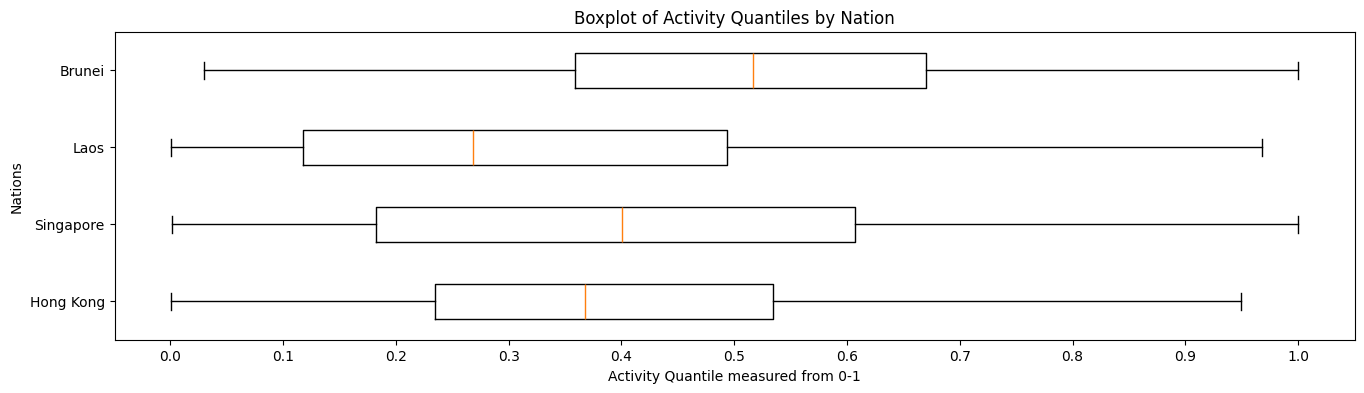

In [4]:
### descriptive visualization
HKQ = df[df['gadm_name']=="Hong Kong"]['n_activity_quantile']
SGQ = df[df['gadm_name']=="Singapore"]['n_activity_quantile']
LAQ = df[df['gadm_name']=="Laos"]['n_activity_quantile']
BRQ = df[df['gadm_name']=="Brunei"]['n_activity_quantile']
fig, ax = plt.subplots( figsize = (16,4))
# QUANTILES BOXPLOT
ax.boxplot([HKQ,SGQ,LAQ,BRQ],vert = False )
ax.set_title("Boxplot of Activity Quantiles by Nation")
ax.set_ylabel("Nations")
ax.set_xlabel("Activity Quantile measured from 0-1")
ax.set_yticklabels(['Hong Kong', 'Singapore', 'Laos', 'Brunei'])
plt.xticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7, 0.8, 0.9, 1])
plt.show()

This is a boxplot of the distribution of Business Activity Trends in **Hong Kong, Singapore, Laos, and Brunei** after 2 years, 6 months, and 4 days after the beginning of COVID-19 restrictions. 
- **Brunei** has a mean of 0.512. This means that business activity has stayed relatively close to the baseline of activity before and after COVID.
- **Laos** has a mean activity quantile of 0.317. It means that the overall business activity in Laos has had some changes in these two years after COVID. 
- **Singapore** has a mean activity quantile of 0.416. Singapore's Business activity has some changes in the two years after COVID.
- **Hong Kong** has a mean activity quantile of 0.39. Hong Kong's business activity over the 2 years after COVID has had some changes. 

___
### Hypothesis #1
#### Melody Hway
In response to the global COVID-19 pandemic, public good services in Hong Kong, Laos, Singapore, and Brunei had an overall increase in Facebook activity during the first year of the COVID-19 pandemic compared to the baseline activity. This is because during a public health crisis, people rely more heavily on public goods to get information about lockdown procedures or health safety information, so they will be posting more on social media to help communicate this information. 

#### Data Visualization

In [5]:
# data segmentation for Public Goods Industry
HK = df[df["gadm0_name"]=="Hong Kong"][['gadm_name','n_activity_quantile','n_activity_percentage','crisis_ds','ds', 'business_vertical']]
SG = df[df["gadm0_name"]=="Singapore"][['gadm_name','n_activity_quantile','n_activity_percentage','crisis_ds','ds', 'business_vertical']]
LA = df[df["gadm0_name"]=="Laos"][['gadm_name','n_activity_quantile','n_activity_percentage','crisis_ds','ds', 'business_vertical']]
BR = df[df["gadm0_name"]=="Brunei"][['gadm_name','n_activity_quantile','n_activity_percentage','crisis_ds','ds', 'business_vertical']]
# individual all activity
HK_All = HK[HK["business_vertical"]=="All"].head(366) 
SG_All = SG[SG["business_vertical"]=="All"].head(366)
LA_All = LA[LA["business_vertical"]=="All"].head(366)
BR_All = BR[BR["business_vertical"]=="All"].head(366)
# joining them together for over all activity in all 4 countries 
All_industry_list  = [HK_All, SG_All, LA_All, BR_All]
All_industries = pd.concat(All_industry_list)
HK_public_good = HK[HK["business_vertical"]=="Public Good"].head(366) 
SG_public_good = SG[SG["business_vertical"]=="Public Good"].head(366)
LA_public_good = LA[LA["business_vertical"]=="Public Good"].head(366)
BR_public_good = BR[BR["business_vertical"]=="Public Good"].head(366)

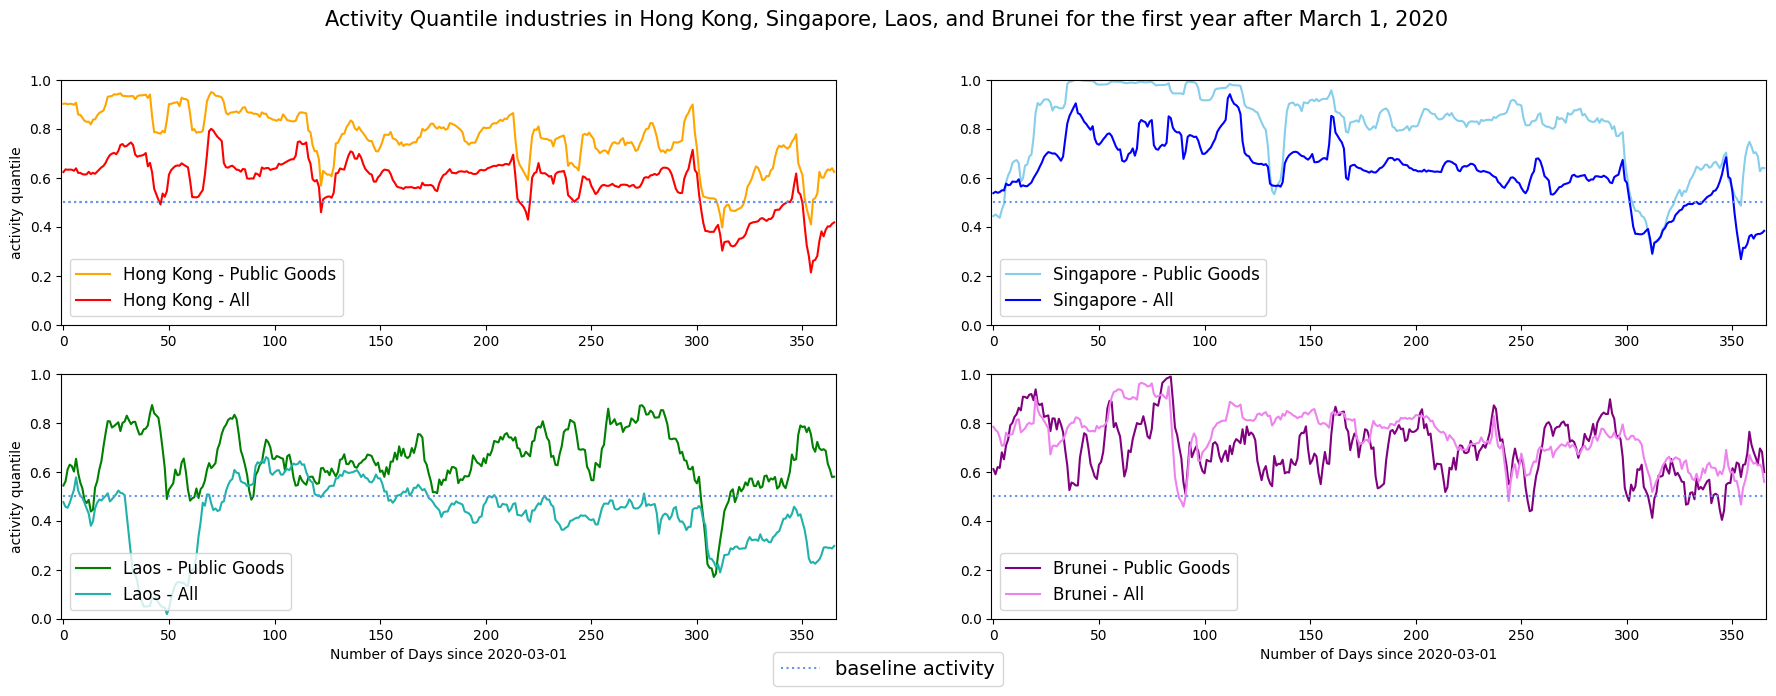

In [6]:
# visualization 
fig, ax = plt.subplots(ncols = 2, nrows=2, figsize = (22,7))
plt.setp(ax, ylim = (0,1), xlim = (-1,366))
# number of days (1 year)
days = range(0,366)
 # can change the colors 
ax[0,0].plot(days, HK_public_good['n_activity_quantile'], color = 'orange')
ax[0,0].plot(days, HK_All['n_activity_quantile'], color = 'red')
ax[0,1].plot(days, SG_public_good['n_activity_quantile'], color = 'skyblue')
ax[0,1].plot(days, SG_All['n_activity_quantile'], color = 'blue')
ax[1,0].plot(days, LA_public_good['n_activity_quantile'], color = 'green')
ax[1,0].plot(days, LA_All['n_activity_quantile'], color = 'lightseagreen')
ax[1,1].plot(days, BR_public_good['n_activity_quantile'], color = 'purple')
ax[1,1].plot(days, BR_All['n_activity_quantile'], color = 'violet')
#xlabels
ax[1,0].set_xlabel("Number of Days since 2020-03-01")
ax[1,1].set_xlabel("Number of Days since 2020-03-01")
# ylabels
ax[0,0].set_ylabel("activity quantile")
ax[1,0].set_ylabel("activity quantile")
# setting the legends
ax[0,0].legend(["Hong Kong - Public Goods","Hong Kong - All"], loc = "lower left", fontsize = "12")
ax[0,1].legend(['Singapore - Public Goods', "Singapore - All"], loc = "lower left", fontsize = "12")
ax[1,0].legend(['Laos - Public Goods','Laos - All'], loc = "lower left", fontsize = "12")
ax[1,1].legend(['Brunei - Public Goods', 'Brunei - All'], loc = "lower left", fontsize = "12")
fig.suptitle("Activity Quantile industries in Hong Kong, Singapore, Laos, and Brunei for the first year after March 1, 2020", fontsize = '15')
# baseline at 0.5  
x1 = [0,370]
y1 = [0.5,0.5]
ax[0,0].plot(x1,y1, c ='cornflowerblue', linestyle = ':')
ax[0,1].plot(x1,y1, c ='cornflowerblue',linestyle = ':')
ax[1,0].plot(x1,y1, c ='cornflowerblue',linestyle = ':')
ax[1,1].plot(x1,y1, c ='cornflowerblue',linestyle = ':')
c = ax[0,0].plot(x1,y1, c ='cornflowerblue', linestyle = ':')
fig.legend(handles = c,labels = ["baseline activity"], loc = "lower center", fontsize = "14")
plt.show()

- This visualization is the representation of the activity quantiles of the public goods sector and all sectors combined for each respective nation, each represented by their own lines.
- The light blue dotted line represents baseline activity that was used as the comparison activity when the researchers created this data.
- This visualization shows that the overall activity of recorded business sectors in each country was less or about the same throughout the first year following the beginning of the pandemic. Interestingly, Hong Kong Public Goods activity followed similar patterns of activity for All business sectors through this first year, but the public Goods sector still had more Facebook activity in comparison.
- For a large portion of the 366 days, most Facebook activity for the public goods sector in all countries stayed above the Baseline activity measure. 
___
#### Statistical Tests

In [7]:
### Your analysis and visualization code below this line
# t-test 
HK_PG_t_test = HK_public_good['n_activity_quantile']
SG_PG_t_test = SG_public_good['n_activity_quantile']
LA_PG_t_test = LA_public_good['n_activity_quantile']
BR_PG_t_test = BR_public_good['n_activity_quantile']
Activity_4_nations = All_industries['n_activity_quantile']
# t-tests each nation's public good activity vs all activity in these 4 
HK_stat, HK_P = stats.ttest_ind(HK_PG_t_test,Activity_4_nations)
SG_stat, SG_P = stats.ttest_ind(SG_PG_t_test,Activity_4_nations)
LA_stat, LA_P = stats.ttest_ind(LA_PG_t_test,Activity_4_nations)
BR_stat, BR_P = stats.ttest_ind(BR_PG_t_test,Activity_4_nations)   

print("Hong Kong stat:", HK_stat,", Hong Kong P-value:", HK_P) # public good activity in {nation} vs all 4 nations overall activity  from the All category
print("Singapore stat:", SG_stat,", Singapore P-value:", SG_P) 
print("Laos stat:", LA_stat,", Laos P-value:", LA_P) 
print("Brunei stat:", BR_stat,", Brunei P-value:", BR_P) 

Hong Kong stat: 18.271063664347544 , Hong Kong P-value: 1.242445139173488e-68
Singapore stat: 22.04337731491097 , Singapore P-value: 1.1025246274722848e-95
Laos stat: 5.970753560702269 , Laos P-value: 2.8305499814664918e-09
Brunei stat: 10.32937784221408 , Brunei P-value: 2.3896841120567635e-24


#### t-test results
To test my hypothesis, I used a t-test to compare the mean activity quantile of the Public Goods sector in each nation compared to the mean of activity quantile for all sectors in all 4 nations.\
I compared the p-values to an alpha value of 0.05. \
I found that all 4 nations did have a departure from the mean of all activity in each nation for those 366 days after March 1, 2020. 
- The Hong Kong statistic was large and the Hong Kong p-value was 1.24 e-68. This means that I can reject the null hypothesis. Thus, for Hong Kong, the public goods business sector's Facebook activity did have an increase when compared to overall business in these 4 nations.
- The Singapore statistic showed a large increasing statistic and its p-value was 1.1 e-95. This means that I can reject the null hypothesis and say that for Public goods sectors in Singapore, there was an increase in Facebook activity when compared to all activity in all 4 nations.
- Laos had a large statistic and a p-value of 2.83e-09 means that I can once again reject the null hypothesis and conclude that Public Goods sectors in Laos supports my hypothesis that there was an increase in activity. 
- Brunei had a large stat value and had a p-value of 9.26e-63 meaning that I can reject the null hypothesis and say that Public goods in Brunei had an increase in Facebook activity during this year. 
- Through t-tests, for all 4 nations, the public goods sector's Facebook activity did, in fact, increase. I can conclude that overall, in these 4 nations, the Facebook activity quantile increased in response to the COVID-19 lockdowns in March 1, 2020 especially in the first year of the pandemic.
#### Interpretation
After March 1, 2020, when lockdowns had begun and people were looking to public goods services like non-profits and governments for reliable communication, the public goods sectors took to posting more on Facebook to distribute reliable information to the public. People rely heavily on these public goods businesses to provide accurate and reliable information, and we see that through the t-test, in Hong Kong, Singapore, Laos, and Brunei all experienced an increase in business activity. I can go on and reject the null hypothesis and say that the evidence goes towards supporting hypothesis number 1.
___

### Hypothesis #2
#### Bella Roy
My hypothesis was that business activity in the lifestyle services industry will decrease in Hong Kong, Singapore, Laos, and Brunei during the first year of the COVID-19 pandemic compared to the average of other industries in the same countries.
#### Visualization

In [8]:
SP = df[df["gadm_name"]=="Singapore"][['gadm_name', 'n_activity_quantile', 'n_activity_percentage', 'crisis_ds', 'ds', 'business_vertical']]
SP_lifestyle_services = SP[SP["business_vertical"]=="Lifestyle Services"].head(366)
HK = df[df["gadm_name"]=="Hong Kong"][['gadm_name', 'n_activity_quantile', 'n_activity_percentage', 'crisis_ds', 'ds', 'business_vertical']]
HK_lifestyle_services = HK[HK["business_vertical"]=="Lifestyle Services"].head(366)
LA = df[df["gadm_name"]=="Laos"][['gadm_name', 'n_activity_quantile', 'n_activity_percentage', 'crisis_ds', 'ds', 'business_vertical']]
LA_lifestyle_services = LA[LA["business_vertical"]=="Lifestyle Services"].head(366)
BN = df[df["gadm_name"]=="Brunei"][['gadm_name', 'n_activity_quantile', 'n_activity_percentage', 'crisis_ds', 'ds', 'business_vertical']]
BN_lifestyle_services = BN[BN["business_vertical"]=="Lifestyle Services"].head(366)

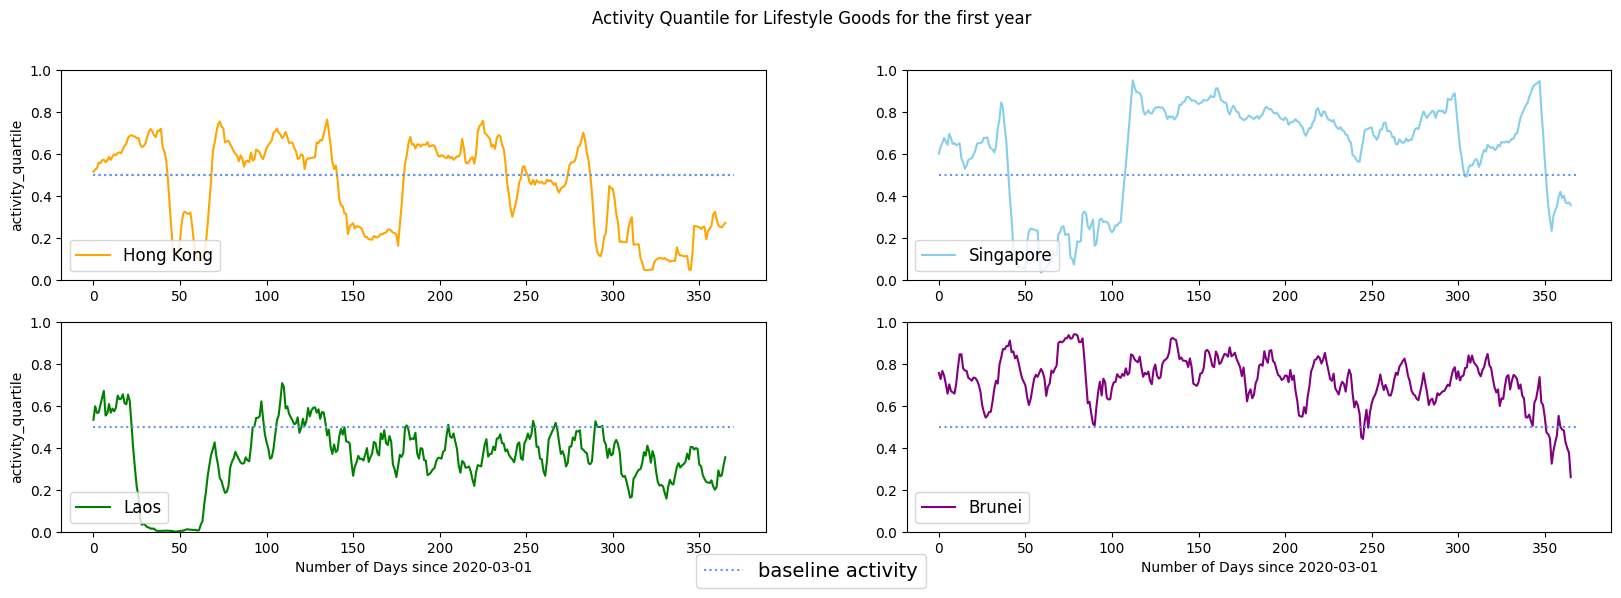

In [9]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize = (20,6))
plt.setp(ax, ylim = (0,1))
days = range (0,366)
ax[0, 0].plot(days, HK_lifestyle_services['n_activity_quantile'], c = "orange")
ax[0,1].plot(days, SP_lifestyle_services['n_activity_quantile'], c="skyblue")
ax[1,0].plot(days, LA_lifestyle_services['n_activity_quantile'], c ="green")
ax[1,1].plot(days, BN_lifestyle_services['n_activity_quantile'], c= "purple")
ax[1,0].set_xlabel ("Number of Days since 2020-03-01")
ax[1,1].set_xlabel ("Number of Days since 2020-03-01")
ax[0,0].set_ylabel("activity_quartile")
ax[1,0].set_ylabel("activity_quartile")
ax[0,0].legend(["Hong Kong"], loc = "lower left", fontsize = "12")
ax[0,1].legend(['Singapore'], loc = "lower left", fontsize = "12")
ax[1,0].legend(['Laos'], loc = "lower left", fontsize = "12")
ax[1,1].legend(['Brunei'], loc = "lower left", fontsize = "12")
# baseline at 0.5  
x1 = [0,370]
y1 = [0.5,0.5]
ax[0,0].plot(x1,y1, c ='cornflowerblue', linestyle = ':')
ax[0,1].plot(x1,y1, c ='cornflowerblue',linestyle = ':')
ax[1,0].plot(x1,y1, c ='cornflowerblue',linestyle = ':')
ax[1,1].plot(x1,y1, c ='cornflowerblue',linestyle = ':')
c = ax[0,0].plot(x1,y1, c ='cornflowerblue', linestyle = ':')
fig.legend(handles = c,labels = ["baseline activity"], loc = "lower center", fontsize = "14")
fig.suptitle("Activity Quantile for Lifestyle Goods for the first year")
plt.show ()

Pictured here is a graph of the activity quartile for lifestyle services in these countries. Interestingly, there is a large drop in activity in the first fifty days for every country except Brunei. They then returned to fluctuating activity quantiles that remained at a somewhat stable baseline. These differences could be attributed to different responses to the pandemic and economical strength pre-COVID. Because of other variables, it’s impossible to determine from the data available whether or not association can be confirmed.

#### Statistical Tests

In [10]:
#T-Test 
HK_All = HK[HK['business_vertical'] == 'All'].head(366)
SP_All = SP[SP['business_vertical'] == 'All'].head(366)
LA_All = LA[LA['business_vertical'] == 'All'].head(366)
BN_All = BN[BN['business_vertical'] == 'All'].head(366)

All_industry_list = [HK_All, SP_All, LA_All, BN_All]
All_industries = pd.concat(All_industry_list)

HK_LS_t_test = HK_lifestyle_services['n_activity_quantile']
SP_LS_t_test = SP_lifestyle_services['n_activity_quantile']
LA_LS_t_test = LA_lifestyle_services['n_activity_quantile']
BN_LS_t_test = BN_lifestyle_services['n_activity_quantile']
Activity_4_nations = All_industries['n_activity_quantile']

HK_stat, HK_P = stats.ttest_ind(HK_LS_t_test,Activity_4_nations)
SP_stat, SP_P = stats.ttest_ind(SP_LS_t_test,Activity_4_nations)
LA_stat, LA_P = stats.ttest_ind(LA_LS_t_test,Activity_4_nations)
BN_stat, BN_P = stats.ttest_ind(BN_LS_t_test,Activity_4_nations)
ANOVA_stat, ANOVA_p = stats.f_oneway(HK_LS_t_test, SP_LS_t_test, LA_LS_t_test, BN_LS_t_test)

print ("Hong Kong stat:", HK_stat, "and Hong Kong P-value:", HK_P) 
print ("Singapore stat:", SP_stat, "and Singapore P-value:", SP_P)
print ("Laos stat:", LA_stat, "and Laos P-value:", LA_P)
print ("Brunei stat:", BN_stat, 'and Brunei P-value:', BN_P)
print ("ANOVA stat:", ANOVA_stat, "ANOVA P-value:", ANOVA_p)

Hong Kong stat: -14.4904448128999 and Hong Kong P-value: 3.9925222780561554e-45
Singapore stat: 2.5059821227858166 and Singapore P-value: 0.01229746213712597
Laos stat: -24.9779143937513 and Laos P-value: 1.0203072081272072e-118
Brunei stat: 13.948555760693974 and Brunei P-value: 4.256235879954075e-42
ANOVA stat: 289.54140079952316 ANOVA P-value: 1.8438340274264735e-147


#### Explanation/Interpretation
My hypothesis was that business activity in the lifestyle services industry will decrease in Hong Kong, Singapore, Laos, and Brunei during the first year of the COVID-19 pandemic compared to the average of other industries in the same countries. I performed a t-test based on lifestyle goods’ mean activity quantile of each nation and the mean of activity quantile for all sectors in the nations. The results neither confirmed nor denied my hypothesis.\
Some t-tests confirmed the hypothesis. For Hong Kong, the large negative t-statistic and low p-value show a statistically significant decrease  For Brunei, the t-statistic was very large and negative with an extremely low p-value. Both of these results indicated a significant decrease in business activity in the lifestyle services industry, which also supports the hypothesis.\
Others were not in favor of the hypothesis. The t-test for Singapore resulted in a positive t-statistic and significant p-value shows an increase of the lifestyle services industry. Laos’s positive t-statistic and significant p-value indicated an increase of the lifestyle services industry. These results contradict the hypothesis.\
These differences could be attributed to different responses to the pandemic and economical strength pre-COVID. Because of other variables, it’s impossible to determine from the data available whether my hypothesis is correct.
___


### Hypothesis #3
#### Sadie Szeto

The impact of the virus on business activity levels will differ significantly between these countries, with Singapore potentially showing the highest resilience in maintaining business activities.


#### Visualization

In [11]:
hkg=df[df['gadm0_name']=='Hong Kong'][['gadm_name','n_activity_quantile','n_activity_percentage','crisis_ds','ds','business_vertical']]
hkg_grocery=hkg[hkg['business_vertical']=='Grocery & Convenience Stores'].head(366)
brn=df[df['gadm0_name']=='Brunei'][['gadm_name','n_activity_quantile','n_activity_percentage','crisis_ds','ds','business_vertical']]
brn_grocery=brn[brn['business_vertical']=='Grocery & Convenience Stores'].head(366)
sgp=df[df['gadm0_name']=='Singapore'][['gadm_name','n_activity_quantile','n_activity_percentage','crisis_ds','ds','business_vertical']]
sgp_grocery=sgp[sgp['business_vertical']=='Grocery & Convenience Stores'].head(366)
laos=df[df['gadm0_name']=='Laos'][['gadm_name','n_activity_quantile','n_activity_percentage','crisis_ds','ds','business_vertical']]
laos_grocery=laos[laos['business_vertical']=='Grocery & Convenience Stores'].head(366)

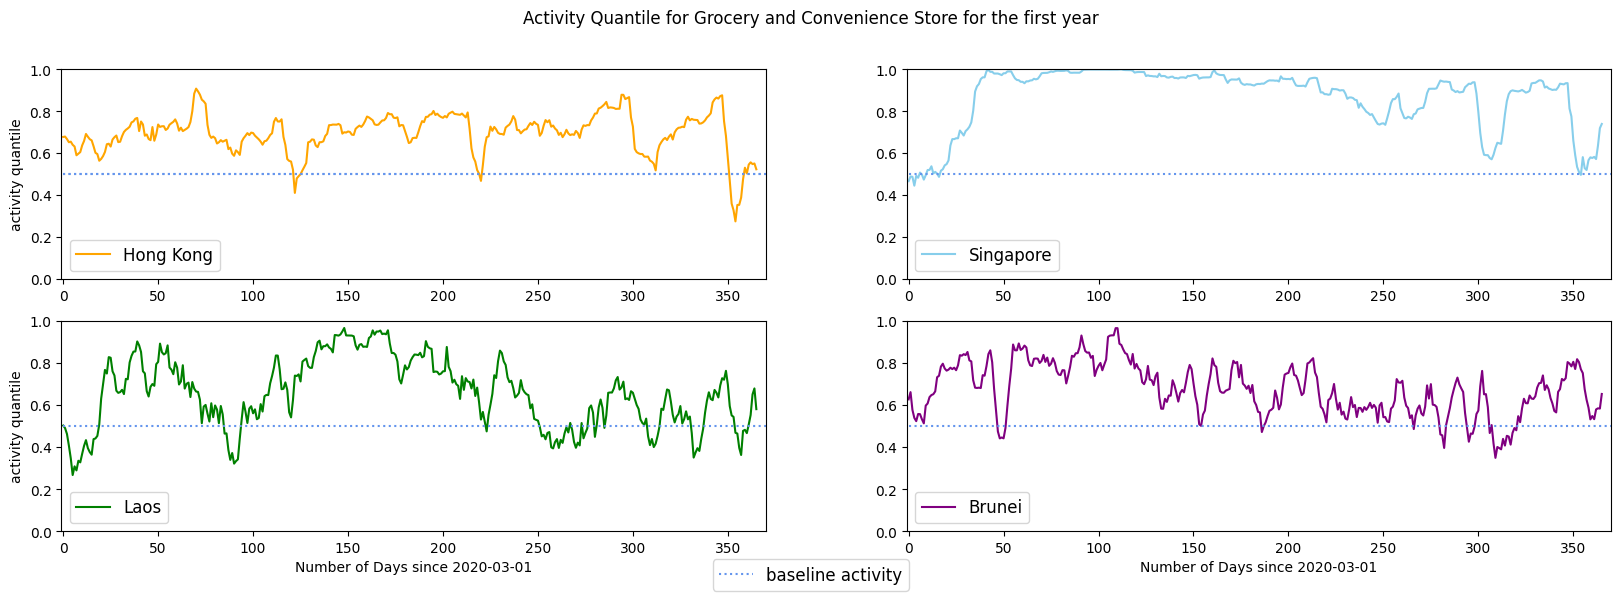

In [12]:
# visualization
fig, ax = plt.subplots(ncols = 2, nrows=2, figsize = (20,6))
plt.setp(ax, ylim = (0,1), xlim = (-1,370))
# number of days in year
days = range(0,366)
# change the colors
ax[0,0].plot(days, hkg_grocery['n_activity_quantile'], color = 'orange')
ax[0,1].plot(days, sgp_grocery['n_activity_quantile'], color = 'skyblue')
ax[1,0].plot(days, brn_grocery['n_activity_quantile'], color = 'green')
ax[1,1].plot(days, laos_grocery['n_activity_quantile'], color = 'purple')
# Labels
ax[1,0].set_xlabel("Number of Days since 2020-03-01")
ax[1,1].set_xlabel("Number of Days since 2020-03-01")
# y labels
ax[0,0].set_ylabel("activity quantile")
ax[1,0].set_ylabel("activity quantile")
# setting the legends
ax[0,0].legend(["Hong Kong"], loc = "lower left", fontsize = "12")
ax[0,1].legend(['Singapore'], loc = "lower left", fontsize = "12")
ax[1,0].legend(['Laos'], loc = "lower left", fontsize = "12")
ax[1,1].legend(['Brunei'], loc = "lower left", fontsize = "12")
fig.suptitle("Activity Quantile for Grocery and Convenience Store for the first year")
# baseline at 0.5
x1 = [0,370]
y1 = [0.5,0.5]
c=ax[0,0].plot(x1,y1, c='cornflowerblue', linestyle = ':')
ax[0,0].plot(x1,y1, c='cornflowerblue', linestyle = ':')
ax[0,1].plot(x1,y1, c='cornflowerblue', linestyle = ':')
ax[1,0].plot(x1,y1, c='cornflowerblue', linestyle = ':')
ax[1,1].plot(x1,y1, c='cornflowerblue', linestyle = ':')
fig.legend(handles = c, labels = ["baseline activity"], loc = "lower center", fontsize = "12")
plt.show()

A set of activity quantile plots for grocery and convenience stores across different countries (Hong Kong, Singapore, Laos, Brunei) over the first year since the onset of the crisis in March 2020.

#### Statistical Tests

In [13]:
from scipy.stats import f_oneway  
hkg_quantiles = hkg_grocery['n_activity_quantile'].dropna().tolist()
brn_quantiles = brn_grocery['n_activity_quantile'].dropna().tolist()
sgp_quantiles = sgp_grocery['n_activity_quantile'].dropna().tolist()
laos_quantiles = laos_grocery['n_activity_quantile'].dropna().tolist()
# Now perform the ANOVA test
f_value, p_value = f_oneway(hkg_quantiles, brn_quantiles, sgp_quantiles, laos_quantiles)
# Print out the F-value and P-value to see if there are significant differences
print(f"F-value: {f_value}")
print(f"P-value: {p_value}")

F-value: 192.7241061755506
P-value: 2.774753368276048e-105


#### Interpretation
To test my hypothesis, I have run an ANOVA test and it reveals significant differences in business activities across grocery and convenience stores in Hong Kong, Singapore, Laos, and Brunei during the first year of the crisis. The ANOVA results, with an extremely low P-value, statistically affirm these observed differences across the countries, underlining the importance of context-specific strategies to manage business activities in grocery and convenience sectors during global disruptions.\
**Singapore**: Singapore demonstrates the highest resilience, maintaining near-maximal activity levels consistently throughout the year, reflecting its effective management of the pandemic through strict quarantine policies and a robust public health. Singapore's approach to COVID-19 involved early and aggressive measures, including comprehensive contact tracing, widespread testing, and strict enforcement of quarantine measures, which likely contributed to sustained consumer confidence and stable supply chain operations during the crisis. \
**Hong Kong**: Hong Kong's graph shows fluctuating trends, indicative of its pre-March 2020 reaction to COVID-19, where residents began stockpiling essentials like toilet paper and disinfectants well before the timeframe of the data provided. The variability in the activity quantiles can be linked to dynamic policy changes in response to the evolving pandemic, with periodic adjustments to social distancing measures and quarantine policies based on case trajectories. This reactive policy environment could lead to periods of increased consumer activity as restrictions eased, followed by drops as measures were reintroduced, affecting consumer mobility and spending habits in grocery and convenience stores.\
**Laos**: In Laos, the response to the initial phase of the pandemic was characterized by a relatively delayed but strict national lockdown, which was not imposed until April 2020, after confirming its first cases in late March​. This delayed response and the economic vulnerabilities, including significant impacts on income and food security​​, likely contributed to the observed fluctuations and lower activity quantities compared to Singapore. The graph showing fluctuations might reflect the initial lack of severe restrictions followed by a sudden and strict lockdown, impacting business operations.\
**Brunei**: Given Brunei geographic and economic characteristics, similar to other small, well-managed economies, it's likely that Brunei implemented effective measures to contain the virus while supporting essential services, including grocery and convenience stores. This would be consistent with the moderate and stable activity quantiles observed in the graphs.
___

### Hypothesis #4
#### Zoe Musch
The average Business activity in the travel industry, as indicated by the frequency of posts on Facebook, will be less in Hong Kong, Singapore, Laos, and Brunei during the first year COVID-19 restrictions compare to before the restrictions were in place.
#### Visualization

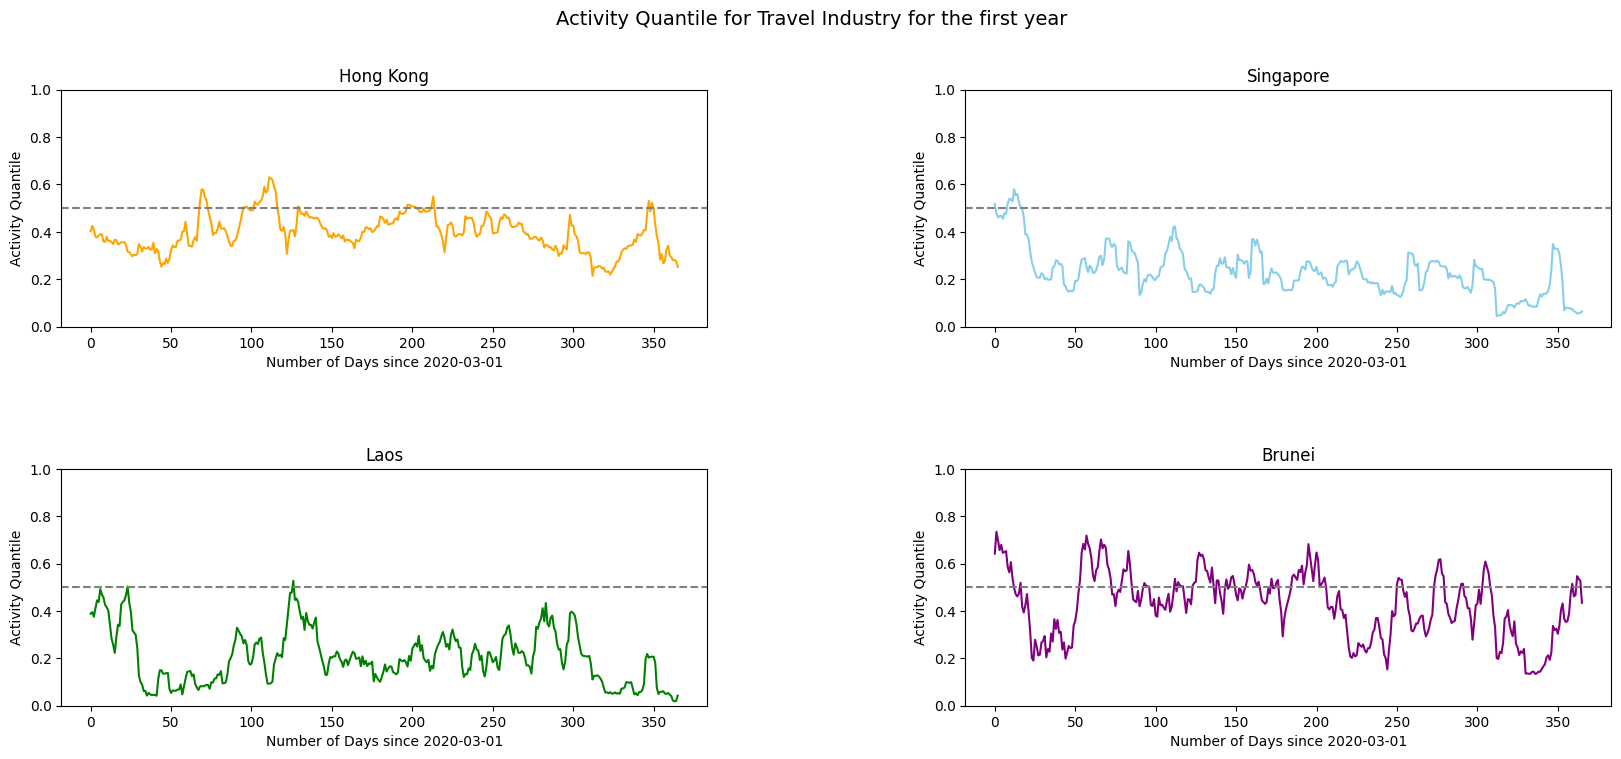

In [14]:
#Visualization: 
#T-test: 	
HK_Travel = HK[HK['business_vertical']=="Travel"].head(366)
SG_Travel = SG[SG['business_vertical']=="Travel"].head(366)
LA_Travel = LA[LA['business_vertical']=="Travel"].head(366)
BR_Travel = BR[BR['business_vertical']=="Travel"].head(366)
# Joining together for over all activity in all 4 countries
All_industry_list = [HK_All, SG_All, LA_All, BR_All]
All_industries = pd.concat(All_industry_list)
# graphs
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(20,8))
plt.setp(ax, ylim = (0,1))
plt.subplots_adjust(wspace=0.4, hspace=0.6)
ax1 = ax[0][0]
ax2 = ax[0][1]
ax3 = ax[1][0]
ax4 = ax[1][1]
days = range(0,366)
ax1.plot(days, HK_Travel['n_activity_quantile'], c="orange")
ax1.axhline(y=0.5, color='grey', linestyle='--')
ax1.set_title("Hong Kong")
ax1.set_xlabel("Number of Days since 2020-03-01")
ax1.set_ylabel("Activity Quantile")
ax2.plot(days, SG_Travel['n_activity_quantile'], c="skyblue")
ax2.axhline(y=0.5, color='gray', linestyle='--')
ax2.set_title("Singapore")
ax2.set_xlabel("Number of Days since 2020-03-01")
ax2.set_ylabel("Activity Quantile")
ax3.plot(days, LA_Travel['n_activity_quantile'], c="green")
ax3.axhline(y=0.5, color='gray', linestyle='--')
ax3.set_title("Laos")
ax3.set_xlabel("Number of Days since 2020-03-01")
ax3.set_ylabel("Activity Quantile")
ax4.plot(days, BR_Travel['n_activity_quantile'], c="purple")
ax4.axhline(y=0.5, color='gray', linestyle='--')
ax4.set_title("Brunei")
ax4.set_xlabel("Number of Days since 2020-03-01")
ax4.set_ylabel("Activity Quantile")
fig.suptitle("Activity Quantile for Travel Industry for the first year", fontsize=14)
plt.show()

In [15]:
# t-tests for Travel industry activity quantile
HK_Travel_t_test = HK_Travel['n_activity_quantile']
SG_Travel_t_test = SG_Travel['n_activity_quantile']
LA_Travel_t_test = LA_Travel['n_activity_quantile']
BR_Travel_t_test = BR_Travel['n_activity_quantile']
Activity_4_nations = All_industries['n_activity_quantile']
HK_stat, HK_P = stats.ttest_ind(HK_Travel_t_test, Activity_4_nations)
SG_stat, SG_P = stats.ttest_ind(SG_Travel_t_test, Activity_4_nations)
LA_stat, LA_P = stats.ttest_ind(LA_Travel_t_test, Activity_4_nations)
BR_stat, BR_P = stats.ttest_ind(BR_Travel_t_test, Activity_4_nations)
# Print results
print("Hong Kong stat:", HK_stat, "and Hong Kong P-value:", HK_P)
print("Singapore stat:", SG_stat, "and Singapore P-value:", SG_P)
print("Laos stat:", LA_stat, "and Laos P-value:", LA_P)
print("Brunei stat:", BR_stat, "and Brunei P-value:", BR_P)

Hong Kong stat: -22.565645873712732 and Hong Kong P-value: 1.1421688465930255e-99
Singapore stat: -40.78773818334112 and Singapore P-value: 3.539783795418107e-259
Laos stat: -43.11271000134771 and Laos P-value: 9.0791153328183e-281
Brunei stat: -18.01018756649351 and Brunei P-value: 6.938246652586207e-67


#### Interpretation:
T-tests were used to compare the means of travel industry activity before and after covid. The low P-values indicate statistically significant differences between travel industry activity during the first year of COVID-19 restrictions and the overall activity baseline. This supports the hypothesis that travel industry activity decreased during the pandemic.\
The graphs display the activity quantile for the Travel industry over the first year of COVID-19 restrictions for Hong Kong, Singapore, Laos, and Brunei. The x-axis represents days since March 1, 2020, and the y-axis shows activity quantile. The horizontal dashed line at 0.5 represents the baseline activity.\
The visualization illustrates distinct patterns of decreased travel activity across the four countries, consistent with the hypothesis. Fluctuations in the graphs reflect periods of varied travel activity, likely influenced by changing restrictions and pandemic conditions. The significant t-test results further confirm that the travel industry activity was notably lower during the pandemic compared to the pre-restriction period, highlighting the substantial impact of COVID-19 restrictions on the travel sector in these regions.


___
### Conclusion
Our analysis of business activity trends across different sectors—Public Goods, Lifestyle Services, Grocery and Convenience Stores, and Travel—in Hong Kong, Singapore, Laos, and Brunei during the first year of the COVID-19 pandemic reveals significant impacts:

1. Public Goods Sector: Our analysis shows a marked increase in Facebook activity in this sector across all four countries, driven by the demand for reliable information during lockdowns.

2. Lifestyle Services: We have found mixed results, with significant activity decreases in Hong Kong and Brunei, while Singapore and Laos saw increases. This variation reflects differing responses to the pandemic and economic resilience.

3. Grocery and Convenience Stores: Analysis reveals significant differences in activity across countries. Singapore maintained high activity due to effective pandemic management. Hong Kong saw fluctuations tied to dynamic policy changes, while Laos and Brunei showed moderate activity levels, influenced by economic vulnerabilities and effective containment measures, respectively.

4. Travel Industry: Our findings confirm a significant decrease in travel activity across all countries, consistent with the global downturn in this sector due to stringent COVID-19 restrictions.

These findings highlight the varied impact of COVID-19 across sectors and regions. Public Goods saw increased activity, Lifestyle Services had mixed responses, Grocery and Convenience Stores demonstrated resilience, and Travel faced significant downturns. This shows the need for tailored strategies to support different sectors, in different countries, during global disruptions.
